In [1]:
from fir import FIRDeconvolution


In [2]:
import pandas

In [35]:
df

,block,trial_NR,cue_delay,stim_delay,cue,coherence,difficulty,stimulus,response,rt,correct,onset_cue,onset_stim,cue_validity,subj_idx,subj_idx_exp
0,1,1,750,1750,neutral,0.08,hard,left,-1,NaN,0,6.75,9.50,neutral,14,10
1,1,2,0,1000,right,0.16,easy,left,2,720.0,0,15.00,17.00,invalid,14,10
2,1,3,1500,1000,left,0.16,easy,left,1,486.0,1,25.50,27.50,valid,14,10
3,1,4,750,1750,neutral,0.16,easy,left,2,689.0,0,33.75,36.50,neutral,14,10
4,1,5,1500,1000,neutral,0.16,easy,left,1,1339.0,1,43.50,45.50,neutral,14,10
5,1,6,1500,3250,neutral,0.08,hard,left,1,1312.0,1,52.50,56.75,neutral,14,10
6,1,7,2250,3250,neutral,0.16,easy,left,1,1429.0,1,62.25,66.50,neutral,14,10
7,1,8,1500,2500,left,0.16,easy,right,1,424.0,0,70.50,74.00,invalid,14,10
8,1,9,1500,1750,left,0.16,easy,left,1,923.0,1,79.50,82.25,valid,14,10
9,1,10,2250,2500,neutral,0.16,easy,left,1,1092.0,1,89.25,92.75,neutral,14,10


In [47]:
conditions=['payoff_cue',
            'neutral_cue',
            'difficult_rdm',
            'easy_rdm']

onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
        df[df.cue == 'neutral'].onset_cue.tolist(),
        df[df.difficulty == 'easy'].onset_stim.tolist(),
        df[df.difficulty == 'hard'].onset_stim.tolist()],

In [67]:
df.head()

,block,trial_NR,cue_delay,stim_delay,cue,coherence,difficulty,stimulus,response,rt,correct,onset_cue,onset_stim,cue_validity,subj_idx,subj_idx_exp
0,1,1,750,1750,neutral,0.08,hard,left,-1,NaN,0,6.75,9.5,neutral,14,10
1,1,2,0,1000,right,0.16,easy,left,2,720.0,0,15.00,17.0,invalid,14,10
2,1,3,1500,1000,left,0.16,easy,left,1,486.0,1,25.50,27.5,valid,14,10
3,1,4,750,1750,neutral,0.16,easy,left,2,689.0,0,33.75,36.5,neutral,14,10
4,1,5,1500,1000,neutral,0.16,easy,left,1,1339.0,1,43.50,45.5,neutral,14,10


In [80]:
def get_signal(subject_id, run, mask):
    subject_id = '%02d' % int(subject_id)
    run = '%02d' % int(run)    
    run0 = int(run) - 1
    
    signal = np.loadtxt('/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_{mask}_subject_id_{subject_id}/_extracter_highpassed_motion{run0}/sub-{subject_id}_task-randomdotmotion_run-{run}_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'.format(**locals()))
    
    signal = (signal / signal.mean()) * 100
    signal -= signal.mean()
    
    return signal

def get_onsets(subject_id, run, design='model0', shift=0):

    df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')
    df = df[(df.subj_idx == subject_id) & (df.block == run)]

    df['onset_cue'] += shift
    df['onset_stim'] += shift
    
    
    if design == 'model0':
        onsets_cue = df.onset_cue.tolist()
        onsets_stim = df.onset_stim.tolist()

        conditions=['onsets_cue',
                    'onsets_stim',]
        
        onsets=[onsets_cue,
                onsets_stim]
        
    elif design == 'model1a':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'difficult_rdm',
                    'easy_rdm']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]
        
        
    elif design == 'model3':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'left response',
                    'right response']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.response == 1].onset_stim.tolist(),
                df[df.response == 2].onset_stim.tolist()]        
        
        
    elif design == 'model4':
        
        onsets_neutral_cue_correct = df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist()
        onsets_neutral_cue_error = df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist()
        
        onsets_valid_cue_correct = df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist()
        onsets_valid_cue_error = df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist()        
        
        onsets_invalid_cue_correct = df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist()
        onsets_invalid_cue_error = df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()                

        
        conditions=['payoff_cue',
                    'neutral_cue',
                    'valid (correct)',
                    'valid (error)',
                    'neutral (correct)',
                    'neutral (error)',
                    'invalid (correct)',
                    'invalid (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                onsets_valid_cue_correct,
                onsets_valid_cue_error,
                onsets_neutral_cue_correct,
                onsets_neutral_cue_error,
                onsets_invalid_cue_correct,
                onsets_invalid_cue_error]                
    
    return dict(zip(conditions, onsets))

In [123]:
import itertools
import pyfir

firs = []

for subject_id in np.arange(1, 20):
    print subject_id
    for i, mask in enumerate(['STh_L', 'STh_R']):
            for run in [1,2,3]:
                try:
                    signal = get_signal(subject_id, run, mask)
                    onsets = get_onsets(subject_id, run, 'model1a', shift=-3)

                    if onsets:
                        fd = FIRDeconvolution(signal, [np.array(e) for e in onsets.values()], onsets.keys(), 
                        covariates=None, 
                        sample_frequency=1/3., 
                        deconvolution_interval=[-4., 15.], 
                        deconvolution_frequency=1)

                        # we then tell it to create its design matrix
                        fd.create_design_matrix()

                        # perform the actual regression, in this case with the statsmodels backend
                        fd.regress()

                        for condition in onsets.keys():

                            betas = fd.betas_for_cov(condition)

                            for time, value in zip(fd.deconvolution_interval_timepoints, betas):
                                firs.append({'mask':mask,
                                             'subject_id':subject_id,
                                             'condition':condition,
                                             't':time,
                                             'value':value[0],
                                             'run':run})

                except Exception as e:
                    print 'Error with %s/%s - %s' % (subject_id, mask, e)




1
2
3
4
5
6
Error with 6/STh_L - [Errno 2] No such file or directory: '/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_STh_L_subject_id_06/_extracter_highpassed_motion2/sub-06_task-randomdotmotion_run-03_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'
Error with 6/STh_R - [Errno 2] No such file or directory: '/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_STh_R_subject_id_06/_extracter_highpassed_motion2/sub-06_task-randomdotmotion_run-03_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'
7
8
9
10
11
12
13
14
15
16
17
18
19


In [82]:
df_firs = pandas.DataFrame(firs)

In [83]:
sns.set_style('whitegrid')
sns.set_context('poster')

STh_L
STh_R


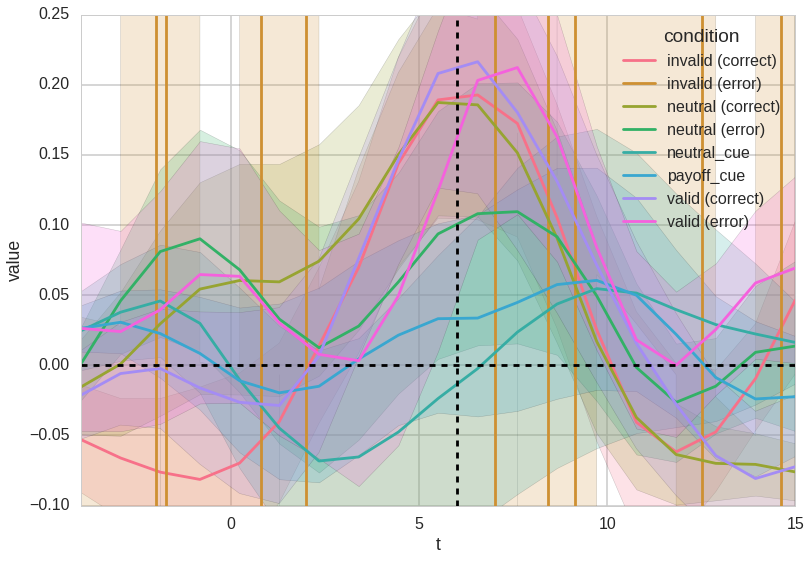

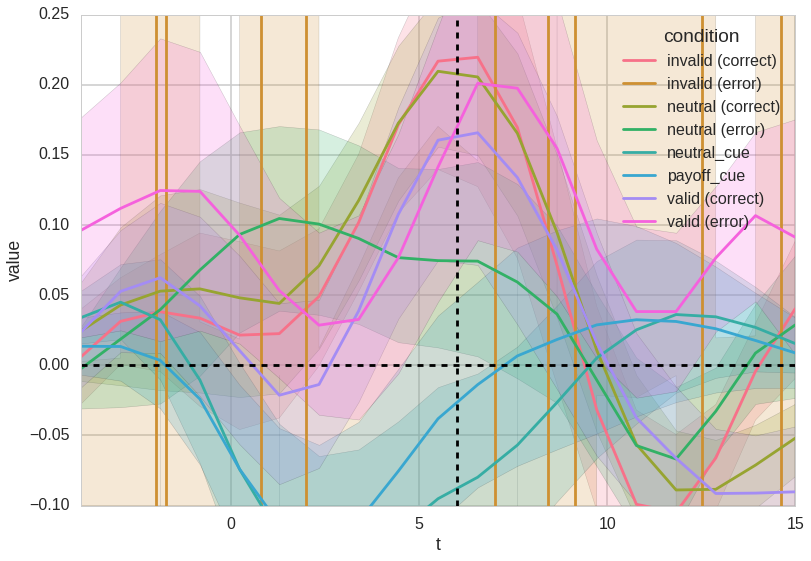

In [86]:
for mask, d in df_firs.groupby(['mask']):
    plt.figure()
    print mask
    tmp = d.groupby(['subject_id', 'condition', 't'], as_index=False).mean()
    sns.tsplot(data=tmp, unit='subject_id', time='t', value='value', condition='condition', )
    plt.axhline(0, c='k', ls='--')
    plt.axvline(6, c='k', ls='--')
    plt.ylim(-.1, .25)

In [93]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

mask = 'STh_L'

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1a', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L', 'STh_R']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions


[(0.89411765336990356, 0.10196078568696976, 0.10980392247438431),
 (0.21602460800432691, 0.49487120380588606, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
 (0.60083047361934883, 0.30814303335021526, 0.63169552298153153),
 (1.0, 0.50591311045721465, 0.0031372549487095253),
 (0.99315647868549117, 0.9870049982678657, 0.19915417450315812)]

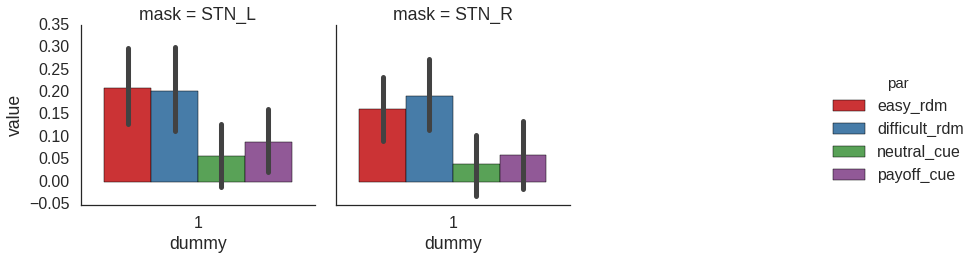

In [122]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm.ix[df_glm['mask'] == 'STh_L', 'mask'] = 'STN_L'
df_glm.ix[df_glm['mask'] == 'STh_R', 'mask'] = 'STN_R'

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95)

In [107]:
tmp = df_glm.pivot_table(index='subject_id', columns=['par', 'mask'], values='value')
t, p = sp.stats.ttest_1samp(tmp, 0)
pandas.DataFrame({'t':t, 'p':p}, index=tmp.columns)

p         t
par           mask                     
difficult_rdm STN_L  0.000076  5.093809
              STN_R  0.000096  4.983458
easy_rdm      STN_L  0.000008  6.161178
              STN_R  0.000365  4.375330
neutral_cue   STN_L  0.133160  1.572874
              STN_R  0.324166  1.013686
payoff_cue    STN_L  0.036060  2.265413
              STN_R  0.227355  1.249867

In [117]:
t, p = sp.stats.ttest_rel(tmp['difficult_rdm'], tmp['easy_rdm'])
pandas.DataFrame({'t':t, 'p':p}, index=tmp.columns.get_level_values(1)[:2])

,p,t
mask,,
STN_L,0.639256,-0.476779
STN_R,0.179718,1.395926


In [119]:
t, p = sp.stats.ttest_rel(tmp['neutral_cue'], tmp['payoff_cue'])
pandas.DataFrame({'t':t, 'p':p}, index=tmp.columns.get_level_values(1)[:2])

,p,t
mask,,
STN_L,0.239647,-1.21612
STN_R,0.530197,-0.64006


# model 4

In [124]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

mask = 'STh_L'

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model4', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L', 'STh_R']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions
Error: 15/STh_L/'invalid (error)'


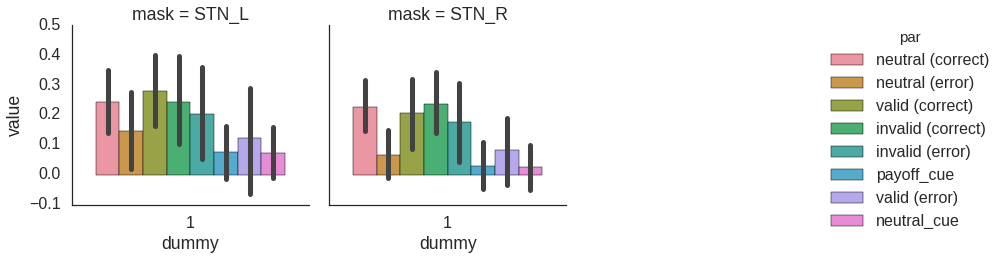

In [125]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm.ix[df_glm['mask'] == 'STh_L', 'mask'] = 'STN_L'
df_glm.ix[df_glm['mask'] == 'STh_R', 'mask'] = 'STN_R'

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95)

In [126]:
df_glm.pivot_table(index=['subject_id', ''])

,mask,par,run,subject_id,value,dummy,% signal change
0,STN_L,neutral (correct),1,1,-0.109698,1,-0.109698
1,STN_L,neutral (error),1,1,0.027110,1,0.027110
2,STN_L,valid (correct),1,1,0.197424,1,0.197424
3,STN_L,invalid (correct),1,1,-0.033203,1,-0.033203
4,STN_L,invalid (error),1,1,0.639403,1,0.639403
5,STN_L,payoff_cue,1,1,0.116783,1,0.116783
6,STN_L,valid (error),1,1,0.742951,1,0.742951
7,STN_L,neutral_cue,1,1,0.262461,1,0.262461
8,STN_R,neutral (correct),1,1,0.169024,1,0.169024
9,STN_R,neutral (error),1,1,-0.095123,1,-0.095123
